In [1]:
from typing import NamedTuple, List, Tuple
from scipy.special import jv
import numpy as np
import matplotlib.pyplot as plt

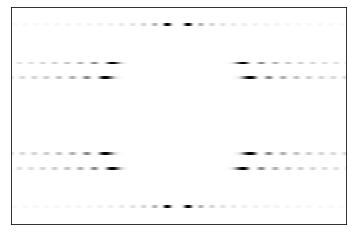

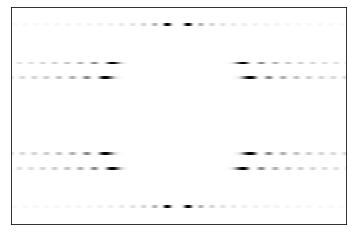

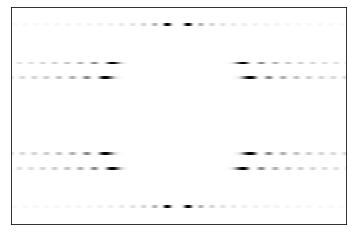

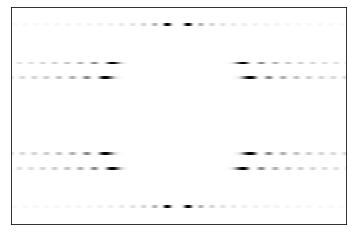

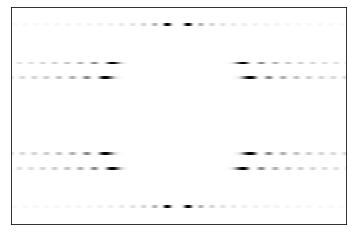

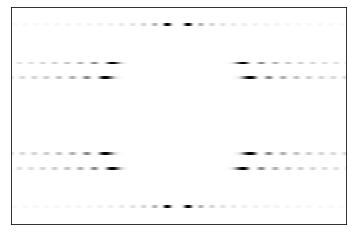

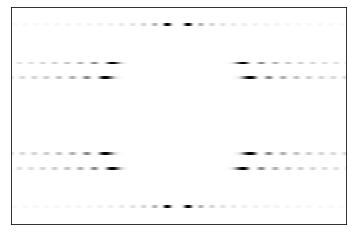

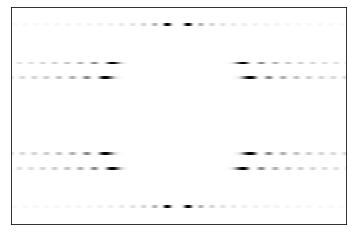

6.99 s ± 233 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit

indices = chiralIndices(17, 2)
d       = diameter(indices)
angle = chiralAngle(indices)

D3 = spacingD3(angle)
D2 = spacingD2(angle)
D1 = spacingD1(angle)

diffraction_distance = D1*600/500

R = np.linspace(-d*5.5, d*5.5, 1000) #nm
radius_spacing = 2*np.pi*R
diffraction_spacing = np.linspace(-diffraction_distance, 
                                  diffraction_distance, 600)


#l1 and D1
y_plot = np.full_like(diffraction_spacing, np.nan, dtype=np.double)

D1spacing_pos = slice(int(300*D1/diffraction_distance+300)-2, 
                     int(300*D1/diffraction_distance+300)+2)

y_plot[D1spacing_pos] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l1_mesh = l1(indices, X, Y)
plt.pcolormesh(radius_spacing, diffraction_spacing, l1_mesh,cmap='Greys')

D1spacing_neg = slice(-int(300*D1/diffraction_distance-300)-2, 
                     -int(300*D1/diffraction_distance-300)+2)




y_plot = np.full_like(diffraction_spacing, np.nan, dtype=np.double)
y_plot[D1spacing_neg] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l1_mesh = l1(indices, X, Y)
plt.pcolormesh(radius_spacing, diffraction_spacing, l1_mesh,cmap='Greys')

#l2 and D2

D2spacing_pos = slice(int(300*D2/diffraction_distance+300)-2, 
                     int(300*D2/diffraction_distance+300)+2)

y_plot = np.full_like(diffraction_spacing, np.nan, dtype=np.double)
y_plot[D2spacing_pos] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l2_mesh = l2(indices, X, Y)
plt.pcolormesh(radius_spacing, diffraction_spacing, l2_mesh,cmap='Greys')

D2spacing_neg = slice(-int(300*D2/diffraction_distance-300)-2, 
                     -int(300*D2/diffraction_distance-300)+2)

y_plot = np.full_like(diffraction_spacing, np.nan, dtype=np.double)
y_plot[D2spacing_neg] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l2_mesh = l2(indices, X, Y)
plt.pcolormesh(radius_spacing, diffraction_spacing, l2_mesh,cmap='Greys')

#l3 and D3

D3spacing_pos = slice(int(300*D3/diffraction_distance+300)-2, 
                     int(300*D3/diffraction_distance+300)+2)

y_plot = np.full_like(diffraction_spacing, np.nan, dtype=np.double)
y_plot[D3spacing_pos] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l3_mesh = l3(indices, X, Y)
plt.pcolormesh(radius_spacing, diffraction_spacing, l3_mesh,cmap='Greys')

D3spacing_neg = slice(-int(300*D3/diffraction_distance-300)-2, 
                     -int(300*D3/diffraction_distance-300)+2)

y_plot = np.full_like(diffraction_spacing, np.nan, dtype=np.double)
y_plot[D3spacing_neg] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l3_mesh = l3(indices, X, Y)
plt.pcolormesh(radius_spacing, diffraction_spacing, l3_mesh,cmap='Greys')



# ax = plt.gca()

plt.xticks([])
plt.yticks([])
plt.show()

1.4159864932339594


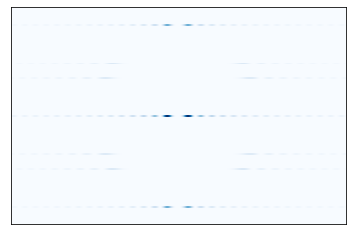

In [281]:
from functools import reduce
from numpy import errstate,isneginf,array


indices = chiralIndices(17, 2)
d       = diameter(indices, scale)
print(d)
angle = chiralAngle(indices)
D3 = spacingD3(angle)
D2 = spacingD2(angle)
D1 = spacingD1(angle)

diffraction_distance = D1*600/500

R = np.linspace(-d*5.5, d*5.5, 1000) #nm
radius_spacing = 2*np.pi*R
diffraction_spacing = np.linspace(-diffraction_distance, 
                                  diffraction_distance, 600)

y_plot = np.full_like(diffraction_spacing, 0, dtype=np.double)

#l0 centered
D0spacing = slice(298, 302)
y_plot[D0spacing] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l0_mesh = l1(indices, X, Y)


#l1 and D1
D1spacing_pos = slice(int(300*D1/diffraction_distance+300)-2, 
                     int(300*D1/diffraction_distance+300)+2)
y_plot[D1spacing_pos] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l1_mesh_upper = l1(indices, X, Y)
D1spacing_neg = slice(-int(300*D1/diffraction_distance-300)-2, 
                     -int(300*D1/diffraction_distance-300)+2)

y_plot = np.full_like(diffraction_spacing, 0, dtype=np.double)
y_plot[D1spacing_neg] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l1_mesh_lower = l1(indices, X, Y)

#l2 and D2
D2spacing_pos = slice(int(300*D2/diffraction_distance+300)-2, 
                     int(300*D2/diffraction_distance+300)+2)

y_plot = np.full_like(diffraction_spacing, 0, dtype=np.double)
y_plot[D2spacing_pos] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l2_mesh_upper = l2(indices, X, Y)
D2spacing_neg = slice(-int(300*D2/diffraction_distance-300)-2, 
                     -int(300*D2/diffraction_distance-300)+2)
y_plot = np.full_like(diffraction_spacing, 0, dtype=np.double)
y_plot[D2spacing_neg] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l2_mesh_lower = l2(indices, X, Y)

#l3 and D3
D3spacing_pos = slice(int(300*D3/diffraction_distance+300)-2, 
                     int(300*D3/diffraction_distance+300)+2)
y_plot = np.full_like(diffraction_spacing, 0, dtype=np.double)
y_plot[D3spacing_pos] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l3_mesh_upper = l3(indices, X, Y)
D3spacing_neg = slice(-int(300*D3/diffraction_distance-300)-2, 
                     -int(300*D3/diffraction_distance-300)+2)
y_plot = np.full_like(diffraction_spacing, 0, dtype=np.double)
y_plot[D3spacing_neg] = 1
(X,Y) = np.meshgrid(radius_spacing,y_plot)
l3_mesh_lower = l3(indices, X, Y)

total_mesh = reduce(np.add, 
                    (l0_mesh,
                     l1_mesh_upper,l1_mesh_lower,
                     l2_mesh_upper,l2_mesh_lower,
                     l3_mesh_upper, l3_mesh_lower))

# if logarithmic
# with errstate(divide='ignore'):
#     log_total_mesh = np.log(total_mesh)
#     log_total_mesh[isneginf(log_total_mesh)]=0


# from numpy import savetxt
# # save to csv file
# savetxt('total_mesh.csv', total_mesh, delimiter=',')

plt.pcolormesh(radius_spacing, diffraction_spacing, total_mesh,cmap='Blues')
# plt.pcolormesh(radius_spacing, diffraction_spacing, log_total_mesh,cmap='Blues')


plt.xticks([])
plt.yticks([])
plt.show()

In [282]:
print(total_mesh[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

$\begin{array}{c}{I_{l 1}(R) \propto\left|J_{m}(\pi \mathrm{d} R)\right|^{2}} \\ {I_{l 2}(R) \propto\left|J_{-n}(\pi \mathrm{d} R)\right|^{2}=\left|J_{n}(\pi \mathrm{d} R)\right|^{2}} \\ {I_{l 3}(R) \propto\left|J_{n+m}(\pi \mathrm{d} R)\right|^{2}} \\ {\text { and }} \\ {\qquad I_{l 4}(R) \propto\left|J_{-(n-m)}(\pi \mathrm{d} R)\right|^{2}=\left|J_{n-m}(\pi \mathrm{d} R)\right|^{2}}\end{array}$

$\left\{\begin{array}{l}{D_{1}=a^{*} \cos (\alpha)} \\ {D_{2}=a^{*} \cos \left(60^{\circ}-\alpha\right)} \\ {D_{3}=a^{*} \cos \left(60^{\circ}+\alpha\right)} \\ {D_{4}=\sqrt{3} a^{*} \cos \left(30^{\circ}-\alpha\right)}\end{array}\right.$

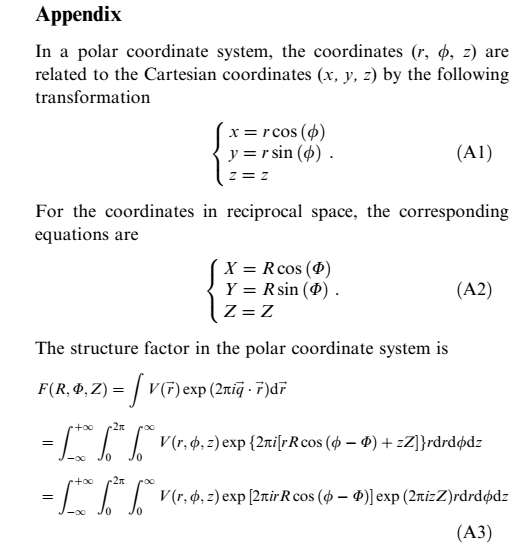

In [521]:
# global a0 length
BASIS_A0 : int = 0.246 #nm

class chiralIndices(NamedTuple):
    n : int
    m : int

def chiralAngle(chiralIndices : NamedTuple) -> float:
    return np.arctan(np.sqrt(3)*chiralIndices.m /
                     (2*chiralIndices.n + chiralIndices.m))

def diameter(chiralIndices : NamedTuple) -> float:
    return BASIS_A0/np.pi * np.sqrt(chiralIndices.n**2
                                    + chiralIndices.m**2
                                    + chiralIndices.n*chiralIndices.m)

def spacingD1(angle : float) -> float:
    '''spacing for l1 pattern from R=0'''
    return BASIS_A0*np.cos(angle)

def spacingD2(angle : float) -> float:
    '''spacing for l2 pattern from R=0'''
    return BASIS_A0*np.cos((60*np.pi/180) - angle)

def spacingD3(angle : float) -> float:
    '''spacing for l3 pattern from R=0'''
    return BASIS_A0*np.cos((60*np.pi/180) + angle)

def spacingD4(angle : float) -> float:
    '''spacing for l4 pattern from R=0'''
    return np.sqrt(3)*BASIS_A0*np.cos((30*np.pi/180) - angle)

def l0_mesh(chiralIndices : NamedTuple, radius_spacing : np.ndarray) -> np.ndarray:
    '''2D mesh of values for l0'''
    return np.abs(jv(0, radius_spacing))**2 

def l1_mesh(chiralIndices : NamedTuple, radius_spacing : np.ndarray) -> np.ndarray:
    '''2D mesh of values for l1'''
    return np.abs(jv(chiralIndices.m, radius_spacing))**2 

def l2_mesh(chiralIndices : NamedTuple, radius_spacing : np.ndarray) -> np.ndarray:
    '''2D mesh of values for l2'''
    return np.abs(jv(chiralIndices.n, radius_spacing))**2

def l3_mesh(chiralIndices : NamedTuple, radius_spacing : np.ndarray) -> np.ndarray:
    '''2D mesh of values for l3'''
    return np.abs(jv(chiralIndices.n + chiralIndices.m, radius_spacing))**2 

def l4_mesh(chiralIndices : NamedTuple, radius_spacing : np.ndarray) -> np.ndarray:
    '''2D mesh of values for l4'''
    return np.abs(jv(chiralIndices.n - chiralIndices.m, radius_spacing))**2 

In [777]:
scale = 5
option = 'Logarithmic'
chiral_n = 18
chiral_m = 12

# define indices from user input
indices = chiralIndices(chiral_n  , chiral_m)

# diameter of carbon nanotube
d       = diameter(indices) 

# chiral angle of carbon nanotube
angle   = chiralAngle(indices) 

diameter_mesh = np.linspace(-d, d, 1000) #nm
radius_spacing = np.pi*diameter_mesh*scale
# diffraction_spacing = np.linspace(-diffraction_distance, 
#                                 diffraction_distance, 1000)
diffraction_spacing = radius_spacing.copy()


# diffraction_distance =  scale*BASIS_A0 #np.pi*d*scale
# diffraction_distance = radius_spacing[1]-radius_spacing[0]
diffraction_distance = np.pi*d*scale/50

from typing import Dict, Callable, Tuple

mesh_layers : Dict[int, Tuple[Callable, float]] = {
                                     1 : (l1_mesh, spacingD1(angle)),
                                     2 : (l2_mesh, spacingD2(angle)),
                                     3 : (l3_mesh, spacingD3(angle)),
                                     4 : (l4_mesh, spacingD4(angle)) }
    
# print(d)
# print(mesh_layers[1][1])
# print(mesh_layers[2][1])
# print(mesh_layers[3][1])
# print(diameter_mesh)
# int(np.floor(500*mesh_layers[1][1]/diffraction_distance+500))

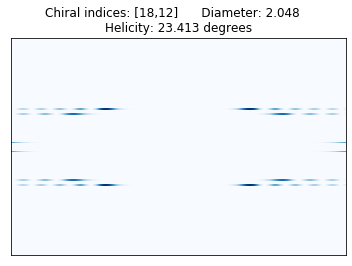

675 653


In [778]:
from numpy import errstate,isneginf

def layer_line_mesh(n : int, #number of layer lines to plot
                    chiralIndices : NamedTuple,
                    mesh_layers : Dict, 
                    diffraction_spacing : np.ndarray,
                    radius_spacing : float,
                    option : str) -> np.ndarray:
    
    total_mesh = np.zeros((1000, 1000))
    
    # Tuple[mesh_function, spacing in nm]
    layer_line_func_1, position_1 = mesh_layers[1] 

    # assumed layer line spacing based on 600 grid spaced Y-axis
    pos_position_slice_1 = int(np.floor(500*position_1/diffraction_distance+500))
    
        # Tuple[mesh_function, spacing in nm]
    layer_line_func_2, position_2 = mesh_layers[2] 

    # assumed layer line spacing based on 600 grid spaced Y-axis
    pos_position_slice_2 = int(np.floor(500*position_2/diffraction_distance+500))


    for i in range(1, n+1):
        
        # Tuple[mesh_function, spacing in nm]
        layer_line_func, position = mesh_layers[i] 
            
        # assumed layer line spacing based on 600 grid spaced Y-axis
        pos_position_slice = int(np.floor(500*position/diffraction_distance+500))
        neg_position_slice = -int(np.floor(500*position/diffraction_distance-500))

        # if not, scale is too 'zoomed in' to appear on plot, do nothing to mesh
        if pos_position_slice+2 <=1000:
            # define layer n_th line
            layer_line = layer_line_func(indices, radius_spacing)

            #define upper slice
            diff_spacing_pos = slice(pos_position_slice-4, 
                                     pos_position_slice+4)        

            #define lower slice
            diff_spacing_neg = slice(neg_position_slice-4, 
                                  neg_position_slice+4)

            total_mesh[diff_spacing_pos, :] = total_mesh[diff_spacing_neg, :] = layer_line

    return total_mesh, pos_position_slice_1, pos_position_slice_2
    
test_mesh, pos1, pos2 = layer_line_mesh(3, indices, 
                            mesh_layers, 
                            diffraction_spacing, 
                            radius_spacing, 
                            option)

plt.xticks([])
plt.yticks([])

plt.title(f'''Chiral indices: [{indices.n},{indices.m}]      Diameter: {round(diameter(indices), 3)}   
Helicity: {round(chiralAngle(indices)*180/np.pi, 3)} degrees''')
plt.pcolormesh(radius_spacing, diffraction_spacing, test_mesh,cmap='Blues')
plt.show()


print(pos1, pos2)

In [781]:
os.chdir('/Users/davisbrown/Desktop/PHYS395/image_dump/')
print(os.getcwd())


/Users/davisbrown/Desktop/PHYS395/image_dump


In [ ]:
import os
from tqdm import tqdm


# os.chdir('Desktop/PHYS395/image_dump/')
print(os.getcwd())

scale = 20

indice_list = [(5,2), (17,2), (18,12), (6,0)]
for factor in tqdm(range(150, 200, 1)):
    os.chdir('/Users/davisbrown/Desktop/PHYS395/image_dump/')
    os.mkdir(f'factor_{factor}')
    os.chdir(f'factor_{factor}')
    for indices in indice_list:
        outside = True
        while outside:
            chiral_n, chiral_m = indices
            indices = chiralIndices(chiral_n  , chiral_m)
            d       = diameter(indices) 
            angle   = chiralAngle(indices) 
            diameter_mesh = np.linspace(-d, d, 1000) 
            radius_spacing = np.pi*diameter_mesh*scale
            diffraction_spacing = radius_spacing.copy()

            #looping on this one
            diffraction_distance = np.pi*d*scale/factor

            mesh_layers : Dict[int, Tuple[Callable, float]] = {
                1 : (l1_mesh, spacingD1(angle)),
                2 : (l2_mesh, spacingD2(angle)),
                3 : (l3_mesh, spacingD3(angle)),
                4 : (l4_mesh, spacingD4(angle)) }
                
            test_mesh, pos1, pos2 = layer_line_mesh(3, indices, 
                                mesh_layers, 
                                diffraction_spacing, 
                                radius_spacing, 
                                option)
#             print(factor, indices, scale, pos1, pos2)
            if pos1 >= 998:
                scale += 1
            elif pos1 - pos2 < 10:
                scale -= 1
            else:
                outside = False
                

        plt.title(f'''Chiral indices: [{indices.n},{indices.m}]      Diameter: {round(diameter(indices), 3)}   
        Helicity: {round(chiralAngle(indices)*180/np.pi, 3)} degrees''')
        plt.pcolormesh(radius_spacing, diffraction_spacing, test_mesh,cmap='Blues')
        plt.savefig(f'indices_{indices.n}_{indices.m}_{scale}.png')











  0%|          | 0/50 [00:00<?, ?it/s]

/Users/davisbrown/Desktop/PHYS395/image_dump/factor_128






  2%|▏         | 1/50 [00:07<05:52,  7.20s/it]



  4%|▍         | 2/50 [00:24<08:09, 10.20s/it]



  6%|▌         | 3/50 [00:51<12:02, 15.36s/it]



  8%|▊         | 4/50 [01:28<16:38, 21.70s/it]



 10%|█         | 5/50 [02:16<22:11, 29.58s/it]



 12%|█▏        | 6/50 [03:12<27:31, 37.53s/it]



 14%|█▍        | 7/50 [04:18<33:04, 46.16s/it]



 16%|█▌        | 8/50 [05:34<38:34, 55.10s/it]



 18%|█▊        | 9/50 [07:01<44:13, 64.72s/it]



 20%|██        | 10/50 [08:38<49:31, 74.29s/it]



 22%|██▏       | 11/50 [10:24<54:31, 83.88s/it]



 24%|██▍       | 12/50 [12:20<59:06, 93.32s/it]



 26%|██▌       | 13/50 [14:25<1:03:32, 103.05s/it]



 28%|██▊       | 14/50 [16:42<1:07:58, 113.30s/it]



 30%|███       | 15/50 [19:09<1:11:57, 123.35s/it]



 32%|███▏      | 16/50 [21:47<1:15:43, 133.64s/it]



 34%|███▍      | 17/50 [24:33<1:18:48, 143.29s/it]



 36%|███▌      | 18/50 [27:25<1:21:06, 152.08s/it]



 38%|███▊      | 19/50 [30:28<1:23:19, 161.28s/it]



 40%|████      